# Model Validation

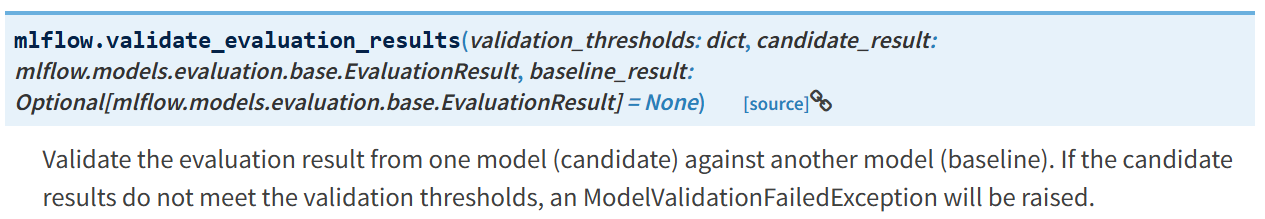

### Validation Thresholds

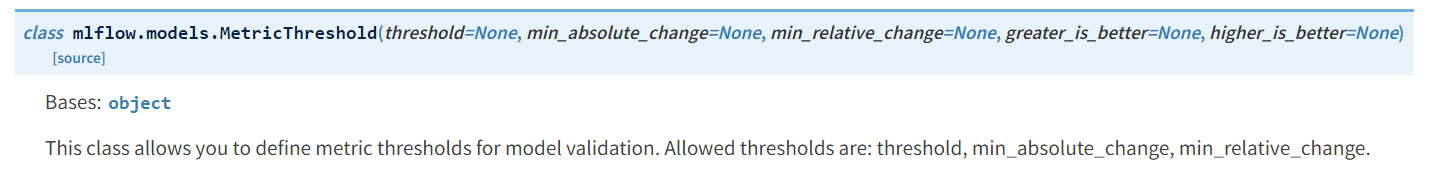

In [ ]:
import random
import mlflow  
import pandas as pd

In [ ]:
eval_df = pd.DataFrame({
    "target" : [random.randint(0, 1) for _ in range(100)],
    "prediction_model1" : [random.randint(0, 1) for _ in range(100)],
    "prediction_model2" : [random.randint(0, 1) for _ in range(100)]
})
eval_df.head()

In [ ]:
result_model1 = mlflow.evaluate(
    data = eval_df,
    predictions="prediction_model1",
    targets="target",
    model_type="classifier"
)

result_model2 = mlflow.evaluate(
    data = eval_df,
    predictions="prediction_model2",
    targets="target",
    model_type="classifier"
)



## Validating models 

### Threshold

In [ ]:
validation_th = {
    "f1_score":mlflow.models.MetricThreshold(
        threshold=0.75,
        min_absolute_change=0.1,
        min_relative_change=0.1,
        greater_is_better=True
    )
}

try:

    mlflow.validate_evaluation_results(validation_thresholds=validation_th, candidate_result=result_model2, baseline_result=result_model1)

except Exception as e:
    
    print("\n".join(str(e).split(". ")))

In [ ]:
# minimum absolute change
result_model2.metrics["f1_score"] > result_model1.metrics["f1_score"] + 0.1

In [ ]:
# minimum relative change
result_model2.metrics["f1_score"] > result_model1.metrics["f1_score"]*(1+0.1)

Let's adjust the values to make the model pass the validation.

In [ ]:
validation_th = {
    "f1_score":mlflow.models.MetricThreshold(
        threshold=0.6,
        min_absolute_change=0.01,
        min_relative_change=0.01,
        greater_is_better=True
    )
}

try:

    mlflow.validate_evaluation_results(validation_thresholds=validation_th, candidate_result=result_model2, baseline_result=result_model1)

except Exception as e:
    
    print("\n".join(str(e).split(". ")))

### Saving and loading evaluation results

In [ ]:
result_model2.save("candidate_model")
result_model1.save("baseline_model")

In [ ]:
from mlflow.models import EvaluationResult

candidate_model = EvaluationResult.load("candidate_model")
baseline_model = EvaluationResult.load("baseline_model")